In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [146]:
# import data from csv with whitespace delimiter
hits = pd.read_csv('./hits.log', sep=' ')
primaries = pd.read_csv('./primaries.log', sep=' ')

# convert
hits['end_t_[mu_s]'] = hits['end_t_[ns]'] / 1000
hits['energy_deposit_[m_eV]'] = hits['energy_deposit_[eV]'] * 1000


hits.head( )

,run_id,event_id,track_id,particle,start_energy_[eV],start_x_[mm],start_y_[mm],start_z_[mm],start_t_[ns],energy_deposit_[eV],track_weight,end_x_[mm],end_y_[mm],end_z_[mm],end_t_[ns],volume,end_t_[mu_s],energy_deposit_[m_eV]
0,0,0,10,phononL,0.002267,-2.40569,-5.23860,0.262618,52630.600,0.002267,1,-2.93157,-1.88755,0.5,56183.9,NaN,56.1839,2.266720
1,0,0,9,phononTS,0.000813,-2.40569,-5.23860,0.262618,52630.600,0.000813,1,-6.61784,32.44280,0.5,67571.1,NaN,67.5711,0.813330
2,0,0,16,phononTF,0.003807,-27.14500,9.57320,-0.001756,597.307,0.003807,1,-10.35800,30.68580,-0.5,24499.3,NaN,24.4993,3.806870
3,0,0,17,phononTS,0.001294,-19.47470,2.15295,-0.367315,16840.400,0.000361,1,-17.05150,10.95670,0.5,39046.4,NaN,39.0464,0.361000
4,0,0,22,phononTS,0.000051,-17.05150,10.95670,0.499998,39046.400,0.000051,1,9.27421,-28.92600,-0.5,81313.0,NaN,81.3130,0.050912


In [150]:
for ind, hit in hits['energy_deposit_[m_eV]']:
    if hit > 10: 
        print(ind, hit)

TypeError: cannot unpack non-iterable float object

In [149]:
# determine if track_id is unique
print('Number of unique track_ids: ', len(hits['event_id.1'].unique()))

KeyError: 'event_id.1'

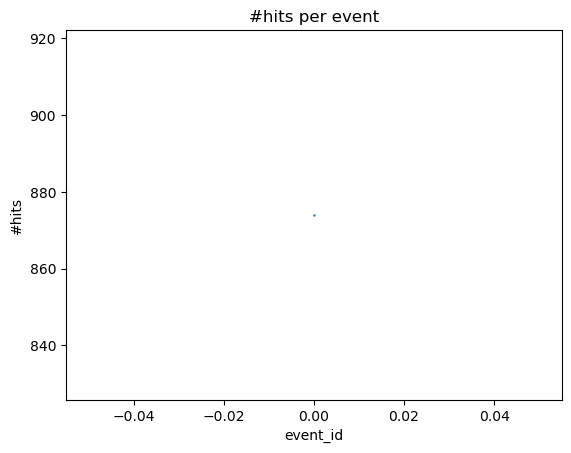

In [145]:
# santiy check, count the number of hits with the same event_id
hits_per_event = hits['event_id'].value_counts()
# scatter plot event_id vs number of hits
plt.scatter(hits_per_event.index, hits_per_event.values, s=0.5)
plt.xlabel('event_id')
plt.ylabel('#hits')
plt.title('#hits per event')
plt.show()


/tmp/ipykernel_1248167/16051912.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_grouped = hits.groupby('time_bin')['energy_deposit_[m_eV]'].sum() / len(primaries)


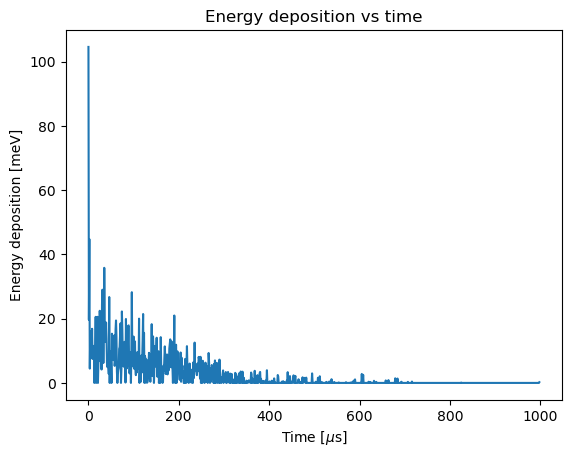

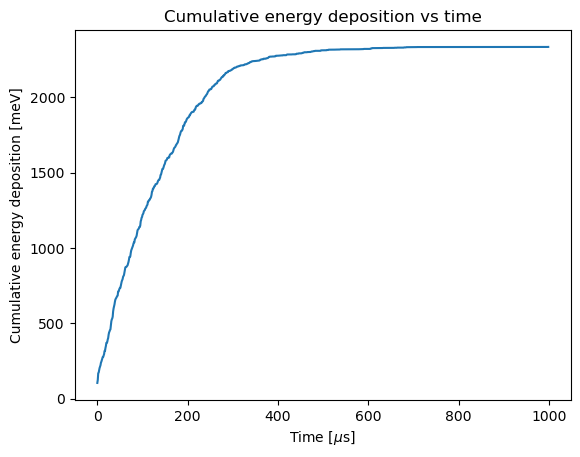

In [ ]:
# plot energy deposition vs time
# bin the time values into 1000 bins
time_bins = np.linspace(0, hits['end_t_[mu_s]'].max(), 1000)
hits['time_bin'] = pd.cut(hits['end_t_[mu_s]'], time_bins)

# group by time bin and sum energy deposition and divide by number of primaries
time_grouped = hits.groupby('time_bin')['energy_deposit_[m_eV]'].sum() / len(primaries)
time_grouped.plot()
plt.xlabel(r'Time [$\mu$s]')
plt.ylabel('Energy deposition [meV]')
plt.title('Energy deposition vs time')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.show()

# same thing but cumulative
time_grouped.cumsum().plot()
plt.xlabel(r'Time [$\mu$s]')
plt.ylabel('Cumulative energy deposition [meV]')
plt.title('Cumulative energy deposition vs time')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.show()


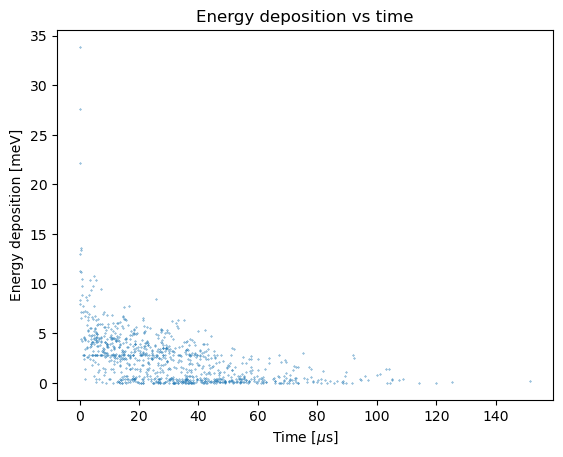

In [ ]:
# scatter plot of time vs energy deposition
time = hits['end_t_[mu_s]']
energy = hits['energy_deposit_[m_eV]']
plt.scatter(time, energy, s=0.1)
plt.xlabel(r'Time [$\mu$s]')
plt.ylabel('Energy deposition [meV]')
plt.title('Energy deposition vs time')
# plt.yscale('log')
plt.show()



In [ ]:
# Sum energy deposition
total_energy = hits['energy_deposit_[m_eV]'].sum()
print('Total energy deposition: ', total_energy/1000, 'eV')

Total energy deposition:  2.333882089266 eV
